### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.01$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) There could be some strong linear relationship between $x$ and $y$.

(c) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.01.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

#### Answer: (d) 

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x doubles (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'>2y$ if b is bigger than one.

(b) $y'<2y$ if b is less than one.

(c) $y'=2y$ in any case.

(d) $y'$ increases by $(2^b-1)*100\%$.

#### Answer: (a),(b),(d) 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

### Question (3): (30 pt)


In [3]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [4]:
y=[28.0, 24.0, 37.0, -7.0, 28.0, 71.0, 89.0, 60.0, 100.0, 108.0, 116.0, 
   110.0, 114.0, 123.0, 124.0, 165.0, 169.0, 211.0, 211.0, 208.0]

In [5]:
data=pd.DataFrame([x,y]).T
data.columns=["x","y"]
data.head()

x     y
0  0.0  28.0
1  1.0  24.0
2  2.0  37.0
3  3.0  -7.0
4  4.0  28.0

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

use the formula:  https://en.wikipedia.org/wiki/Correlation_and_dependence

In [6]:
cor_x_y=((data.x-data.x.mean())*(data.y-data.y.mean())).sum()/(((data.x-data.x.mean())**2).sum()*((data.y-data.y.mean())**2).sum())**0.5
print("Answer is:{}".format(cor_x_y))

Answer is:0.9571434929154872


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [7]:
data.loc[:,"x_sqr"]=data.x*data.x
data.loc[:,"xy"]=data.x*data.y
data.head(3)

x     y  x_sqr    xy
0  0.0  28.0    0.0   0.0
1  1.0  24.0    1.0  24.0
2  2.0  37.0    4.0  74.0

In [8]:
w1=(data.xy.sum()-data.y.sum()*data.x.sum()/len(data))/(data.x_sqr.sum()-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))

w1 is : 10.546616541353384


In [9]:
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 4.2571428571428545


In [10]:
data.loc[:,"pred"]=w1*data.x+w0
data.loc[:,"err"]=data.y-data.pred
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
print("R-sq : {}".format(R_2))

R-sq : 0.9161236660304586


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [12]:
lm = smf.ols(formula='y ~ x', data = data).fit()
print (lm.params)
print (lm.rsquared)

Intercept     4.257143
x            10.546617
dtype: float64
0.91612366603


### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [13]:
data_4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Session02/Housing_Pluto_Session2.csv")

In [14]:
data_4.head()

ZipCode  LotArea  AssessTot
0  11201.0   151930    1164645
1  11201.0     9620    5864850
2  11201.0    19682   12019950
3      NaN        0          0
4  11201.0   387060          0

#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [15]:
data_4=data_4.dropna()
data_4=data_4[data_4.LotArea!=0]
data_4=data_4[data_4.AssessTot!=0]
data_4.head(5)

ZipCode  LotArea  AssessTot
0   11201.0   151930    1164645
1   11201.0     9620    5864850
2   11201.0    19682   12019950
5   11201.0     6384      21150
10  11201.0    66889      11700

#### (b). Visualize the data set.

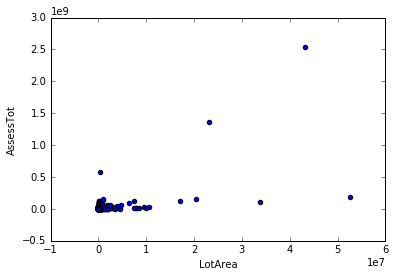

In [16]:
data_4.plot(kind='scatter',x='LotArea',y='AssessTot')
plt.show()

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Tue, 01 Nov 2016   Prob (F-statistic):               0.00
Time:                        21:32:40   Log-Likelihood:            -4.6221e+06
No. Observations:              275982   AIC:                         9.244e+06
Df Residuals:                  275980   BIC:                         9.244e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.694e+04   8648.667      8.897      0.0

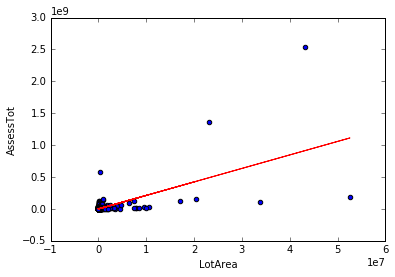

In [17]:
lm = smf.ols(formula='AssessTot ~ LotArea', data = data_4).fit()
print(lm.summary())
data_4.plot(kind='scatter',x='LotArea',y='AssessTot')
plt.plot(data_4.LotArea,lm.predict(),'r-')
plt.show()

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.727e+05
Date:                Tue, 01 Nov 2016   Prob (F-statistic):               0.00
Time:                        21:32:43   Log-Likelihood:            -4.6221e+06
No. Observations:              275982   AIC:                         9.244e+06
Df Residuals:                  275981   BIC:                         9.244e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LotArea       21.1741      0.051    415.580      0.0

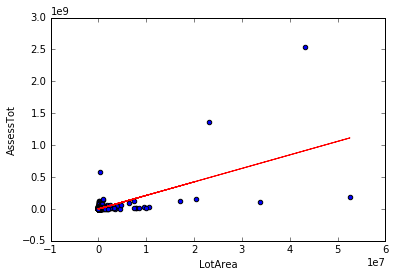

In [18]:
lm = smf.ols(formula='AssessTot ~ LotArea-1', data = data_4).fit()
print(lm.summary())
data_4.plot(kind='scatter',x='LotArea',y='AssessTot')
plt.plot(data_4.LotArea,lm.predict(),'r-')
plt.show()

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [19]:
data_4.loc[:,"log_AssessTot"]=np.log(data_4.AssessTot)
data_4.loc[:,"log_LotArea"]=np.log(data_4.LotArea)
data_4.head()

ZipCode  LotArea  AssessTot  log_AssessTot  log_LotArea
0   11201.0   151930    1164645      13.967927    11.931175
1   11201.0     9620    5864850      15.584487     9.171600
2   11201.0    19682   12019950      16.302078     9.887460
5   11201.0     6384      21150       9.959395     8.761550
10  11201.0    66889      11700       9.367344    11.110790

In [ ]:
lm = smf.ols(formula='log_AssessTot ~ log_LotArea', data = data_4).fit()
print(lm.summary())

#### Answer: W1=1.325, W2=0.2074, R-2=0.491 

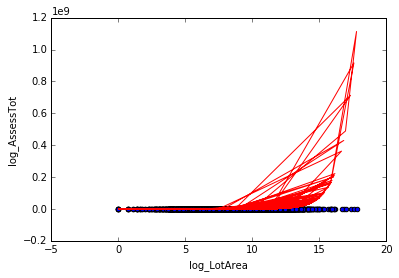

In [20]:
#Plot the results:
data_4.plot(kind='scatter',x='log_LotArea',y='log_AssessTot')
plt.plot(data_4.log_LotArea,lm.predict(),'r-')
plt.show()

### "W1 >1" means log effect exists between area and scale. If a house is two times larger than the other one, the price is more than two times higher.

### *Additional extra-credit question (Using the housing price data set from question (4)) (40 pt to be added to the cumulative homework score up to the maximum of 100%(for whole semester))

#### (a) How many different zip codes are in the data? report the number of observations for each zipcode.

In [21]:
#people who get 42 can get half points. "NaN" is not a zipcode
print("we have different zipcodes: {}".format(len(data_4.ZipCode.unique())))

we have different zipcodes: 41


#### Look online how to use Groupby. It is a more convenient/quicker way compared to using for loop. 

In [24]:
data_4.groupby("ZipCode").size()

ZipCode
11201.0     3361
11203.0    11011
11204.0     9946
11205.0     3196
11206.0     4665
11207.0    11413
11208.0    11284
11209.0     8451
11210.0     8540
11211.0     5462
11212.0     6578
11213.0     5076
11214.0     9513
11215.0     9056
11216.0     6113
11217.0     4035
11218.0     6905
11219.0     8656
11220.0     9015
11221.0     9186
11222.0     5311
11223.0    10322
11224.0     2798
11225.0     3920
11226.0     5336
11228.0     7857
11229.0    12063
11230.0     7987
11231.0     4838
11232.0     2946
11233.0     8014
11234.0    19318
11235.0     7941
11236.0    14612
11237.0     4390
11238.0     4876
11239.0      424
11241.0        1
11249.0     1561
11251.0        1
11416.0        4
dtype: int64

#### (b) For each zip code having over 1000 observations, report the average assessed total value of houses.


In [24]:
#step one: save the result from previous question and sort it.
temp=pd.DataFrame(data_4.groupby("ZipCode").size())
temp.columns=["size"]
temp.sort_values(by="size").head()

size
ZipCode      
11241.0     1
11251.0     1
11416.0     4
11239.0   424
11249.0  1561

In [25]:
#Step two: Get the list for Zipcodes have more than 1000 observations:
list_1000=list(temp[temp.loc[:,"size"]>=1000].index)
print list_1000

[11201.0, 11203.0, 11204.0, 11205.0, 11206.0, 11207.0, 11208.0, 11209.0, 11210.0, 11211.0, 11212.0, 11213.0, 11214.0, 11215.0, 11216.0, 11217.0, 11218.0, 11219.0, 11220.0, 11221.0, 11222.0, 11223.0, 11224.0, 11225.0, 11226.0, 11228.0, 11229.0, 11230.0, 11231.0, 11232.0, 11233.0, 11234.0, 11235.0, 11236.0, 11237.0, 11238.0, 11249.0]


In [26]:
#Step Three, get the new data set which contains only these zip codes.
data_5=data_4[data_4.ZipCode.isin(list_1000)]

In [27]:
#Step Four: get the answer
data_5.groupby("ZipCode").AssessTot.mean()

ZipCode
11201.0    1.672253e+06
11203.0    1.210203e+05
11204.0    1.045425e+05
11205.0    3.509409e+05
11206.0    3.115333e+05
11207.0    1.003423e+05
11208.0    8.644045e+04
11209.0    1.731870e+05
11210.0    1.194678e+05
11211.0    2.493017e+05
11212.0    1.664262e+05
11213.0    1.696212e+05
11214.0    1.270644e+05
11215.0    1.697184e+05
11216.0    1.251104e+05
11217.0    4.832978e+05
11218.0    1.308874e+05
11219.0    1.407409e+05
11220.0    1.345459e+05
11221.0    9.060183e+04
11222.0    2.034066e+05
11223.0    1.034725e+05
11224.0    3.096797e+05
11225.0    2.191019e+05
11226.0    2.591685e+05
11228.0    6.712798e+04
11229.0    3.082203e+05
11230.0    1.488702e+05
11231.0    1.870814e+05
11232.0    3.860844e+05
11233.0    8.335983e+04
11234.0    1.548391e+05
11235.0    2.169321e+05
11236.0    7.765376e+04
11237.0    1.529543e+05
11238.0    2.652606e+05
11249.0    7.146325e+05
Name: AssessTot, dtype: float64

In [196]:
avg_price=data_5.groupby("ZipCode").AssessTot.mean()
avg_price=avg_price.reset_index()
avg_price.head()

ZipCode     AssessTot
0  11201.0  1.672253e+06
1  11203.0  1.210203e+05
2  11204.0  1.045425e+05
3  11205.0  3.509409e+05
4  11206.0  3.115333e+05

#### (c) For each zip code estimate the log scale model 'log_AssessTot ~ log_LotArea' and report the slope coefficient (scaling exponent).

In [28]:
def linear_regression(data):
    lm = smf.ols(formula='log_AssessTot ~ log_LotArea', data = data).fit()
    return lm.params[1]

In [29]:
# We do not consider those zipcodes which contain less than 1000 observations here.
data_5.groupby("ZipCode").apply(lambda x: linear_regression(x))

ZipCode
11201.0    1.405662
11203.0    1.391849
11204.0    1.280166
11205.0    1.503683
11206.0    1.487366
11207.0    1.341991
11208.0    1.164593
11209.0    1.249751
11210.0    1.245899
11211.0    1.412142
11212.0    1.484992
11213.0    1.584304
11214.0    1.118207
11215.0    1.541013
11216.0    1.649113
11217.0    1.415730
11218.0    1.282553
11219.0    1.452945
11220.0    1.500793
11221.0    1.592814
11222.0    1.159196
11223.0    1.258820
11224.0    1.057399
11225.0    1.578187
11226.0    1.386247
11228.0    0.923342
11229.0    1.336506
11230.0    1.306245
11231.0    1.135323
11232.0    1.378675
11233.0    1.521394
11234.0    1.019636
11235.0    1.299189
11236.0    1.118443
11237.0    1.368369
11238.0    1.621558
11249.0    1.242015
dtype: float64

#### (d) Visualize the spatial distribution of the values from (b) and (c). Report the top 5 zip code with highest scaling exponents.

In [47]:
# Top 5 zip code with highest scaling exponents:
#(1)Save previous table
res=pd.DataFrame(data_5.groupby("ZipCode").apply(lambda x: linear_regression(x)))
res=res.reset_index()
#(2)sort it and take the highest five values.
res.sort_values(by=0,ascending=False).iloc[:5,:]

ZipCode         0
14  11216.0  1.649113
35  11238.0  1.621558
19  11221.0  1.592814
11  11213.0  1.584304
23  11225.0  1.578187

In [ ]:
# Visulize values (b) and (c).

#### (It is ok if you plot only on the centroids for each zip code. In that case, you need x,y coordinates data for each zip code in our observations. I use boundary coordinates here. This plotting is difficult.)

In [214]:
#import shapefile
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

zipsf = shp.Reader('NY_shapefile/NY.shp')
zipsf_records=zipsf.records()
zipsf_shape=zipsf.shapeRecords()

#for plotting our result
def plot_spatial_distribution(result,t,n=200):
    x = {}
    center=[]
    for i in range(len(result)):
        key=result.loc[i,'ZipCode']
        x[key]=result.iloc[i,-1]

    #x is a dictionary (zip codes vs values)
    cmap = plt.cm.cool(np.linspace(0,8,2000))

    v2=np.log(max(x.values()))
    v1=np.log(min(x.values()))

    fig = plt.figure(figsize = (15,10)) 
    ax = fig.gca() 
    for s in range(0,len(zipsf_records)):
        z=int(zipsf_records[s][0])
        if z in x.keys(): 
            #from here
            v=x[z]
            k = int((np.log(v)-v1)/(v2-v1)*n)
            c=cmap[k][0:3]

            shape=zipsf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            temp=[poly.centroid.x,poly.centroid.y,v]
            center.append(temp)

            ax.add_patch(PolygonPatch(poly, fc=c,ec="k", alpha=0.5, zorder=2 ))
    center=pd.DataFrame(center)
    center.columns=["x","y","z"]
    sc = plt.scatter(center.x, center.y,c=list(center.z),cmap=plt.cm.cool)
    plt.colorbar(sc)
    plt.title("Spatial distribution of "+t)
    plt.show()

####  A.Spatial distribution for Average Price.

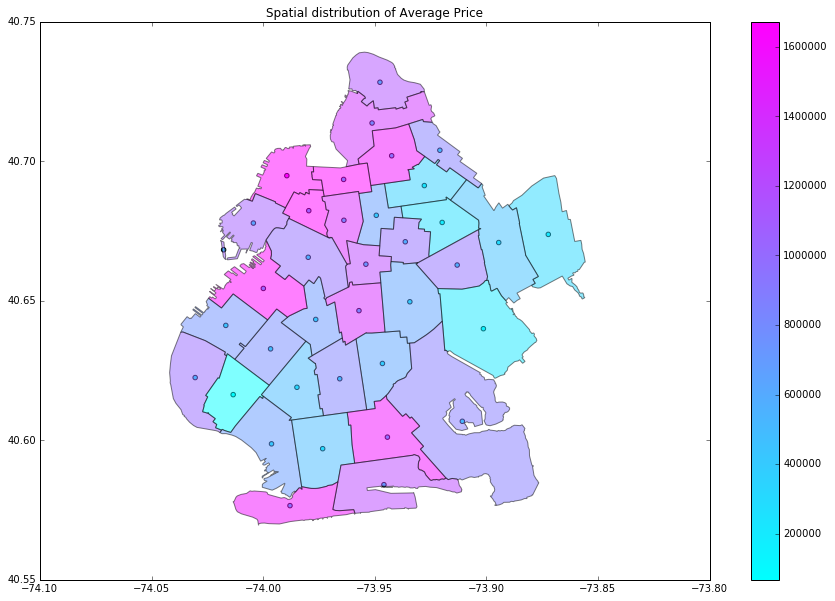

In [219]:
plot_spatial_distribution(avg_price,"Average Price",n=500)

#### B.Spatial Distribution for Log Effect.

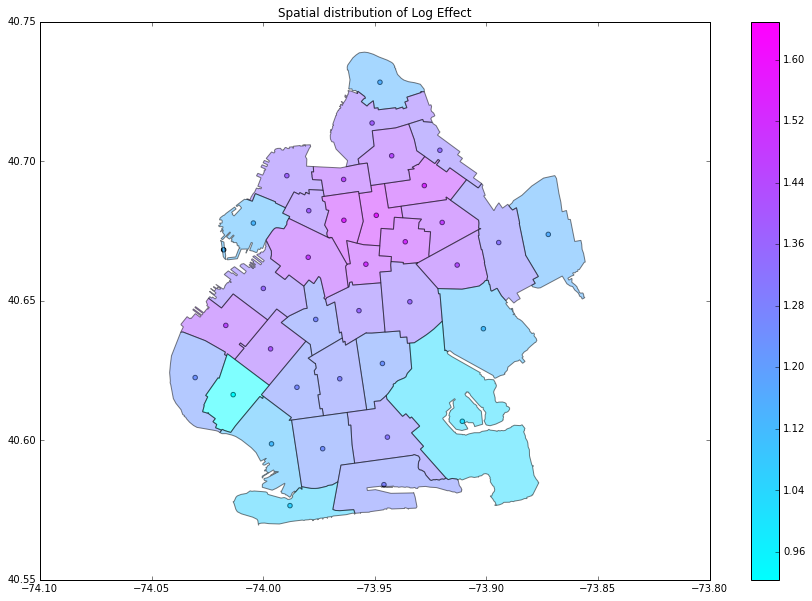

In [215]:
plot_spatial_distribution(res,"Log Effect")